In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [42]:
df=pd.read_excel('data.xlsx')
df.head()

,Unnamed: 0,Năm,Quý,Ggrdp,Gnlts,Gcnxd,Gtmdv,Gtsp
0,3T/2017,2017.0,3T,7.46,5.63,6.67,7.95,7.10
1,6T/2017,NaN,6T,7.76,5.90,7.20,7.40,9.80
2,9T/2017,NaN,9T,7.97,6.20,7.70,7.70,9.20
3,12T/2017,NaN,12T,8.25,6.25,7.84,8.23,9.05
4,3T/2018,2018.0,3T,7.64,5.83,7.25,7.98,7.09


In [43]:
quarters = []
for year in range(2017, 2024):
    for quarter in range(1, 5):
        if year == 2023 and quarter > 2:  # Dừng lại tại quý 2/2023
            break
        quarters.append(f"Q {quarter}/{year}")

# Thêm cột quý vào DataFrame
df['Quarter'] = quarters

In [44]:
df = df.set_index('Quarter')

In [45]:
df.columns

Index(['Unnamed: 0', 'Năm', 'Quý', 'Ggrdp', 'Gnlts', 'Gcnxd', 'Gtmdv', 'Gtsp'], dtype='object')

In [46]:
df = df.rename(columns={'Gnlts': 'gAFFS', 'Gcnxd': 'gINCS', 'Gtmdv': 'gTRSS','Gtsp':'gPTX','Ggrdp':'gGRDP'})

<Axes: xlabel='Quarter'>

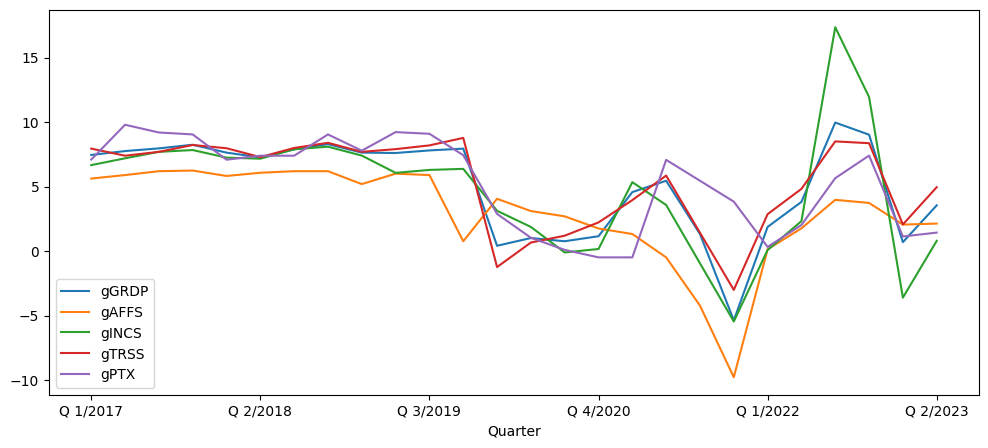

In [47]:
df['gGRDP'].plot(figsize=(12,5),legend=True)
df['gAFFS'].plot(legend=True)
df['gINCS'].plot(legend=True)
df['gTRSS'].plot(legend=True)
df['gPTX'].plot(legend=True)

In [48]:
df.columns

Index(['Unnamed: 0', 'Năm', 'Quý', 'gGRDP', 'gAFFS', 'gINCS', 'gTRSS', 'gPTX'], dtype='object')

In [49]:
columns_to_shift = df.columns.difference(['Quarter'])

In [50]:
for col in columns_to_shift:
    df[f'{col}_lag1'] = df[col].shift(1)

In [51]:
df.head()

,Unnamed: 0,Năm,Quý,gGRDP,gAFFS,gINCS,gTRSS,gPTX,Năm_lag1,Quý_lag1,Unnamed: 0_lag1,gAFFS_lag1,gGRDP_lag1,gINCS_lag1,gPTX_lag1,gTRSS_lag1
Quarter,,,,,,,,,,,,,,,,
Q 1/2017,3T/2017,2017.0,3T,7.46,5.63,6.67,7.95,7.10,NaN,None,None,NaN,NaN,NaN,NaN,NaN
Q 2/2017,6T/2017,NaN,6T,7.76,5.90,7.20,7.40,9.80,2017.0,3T,3T/2017,5.63,7.46,6.67,7.10,7.95
Q 3/2017,9T/2017,NaN,9T,7.97,6.20,7.70,7.70,9.20,NaN,6T,6T/2017,5.90,7.76,7.20,9.80,7.40
Q 4/2017,12T/2017,NaN,12T,8.25,6.25,7.84,8.23,9.05,NaN,9T,9T/2017,6.20,7.97,7.70,9.20,7.70
Q 1/2018,3T/2018,2018.0,3T,7.64,5.83,7.25,7.98,7.09,NaN,12T,12T/2017,6.25,8.25,7.84,9.05,8.23


In [52]:
df_1=df[['gGRDP','gAFFS_lag1', 'gGRDP_lag1',
       'gINCS_lag1', 'gPTX_lag1', 'gTRSS_lag1']]

In [53]:
df_1=df_1.dropna()

In [55]:
df_1.columns

Index(['gGRDP', 'gAFFS_lag1', 'gGRDP_lag1', 'gINCS_lag1', 'gPTX_lag1',
       'gTRSS_lag1'],
      dtype='object')

In [56]:
X=df_1[['gAFFS_lag1','gINCS_lag1', 'gPTX_lag1', 'gTRSS_lag1']]
y=df_1['gGRDP']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 12)

In [17]:
import VisualizeNN as VisNN
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\__init__.py)

In [58]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [59]:
X_trainscaled

array([[ 0.62363897,  0.40422458,  0.70499512,  0.60862237],
       [ 0.90927514,  0.36782845,  0.49851119,  0.70036626],
       [-0.50983789, -1.30411904, -1.5633783 , -1.52114636],
       [ 0.07050226,  2.66760927,  0.07669403,  0.87402432],
       [ 0.81859699,  0.23589245,  0.50146096,  0.69053655],
       [ 0.94101249,  0.15172639,  1.09141504,  0.77245074],
       [-0.03831152,  1.43696493,  0.59290384,  0.82815238],
       [-0.80000797, -2.10028451, -1.25660218, -1.23608501],
       [-0.93149128, -0.75135273, -0.99407262, -0.33175244],
       [ 0.99088547,  0.09940695,  1.12976205,  0.67743029],
       [-0.32394769, -0.85371686, -1.28609988, -1.69480443],
       [ 1.02262282,  0.34963038,  0.58995407,  0.47428311],
       [-1.13098321, -0.06437567, -1.73446498, -0.61681379],
       [ 0.10677352, -0.56937205, -0.74039236, -2.31735221],
       [-1.66598429, -1.26089863, -1.49553358, -0.97395962],
       [ 1.09969925,  0.5020392 ,  1.07666619,  0.78228044],
       [ 1.07702971,  0.

In [62]:
list_i=[]
list_RMSE=[]
list_MSE=[]
list_MAE=[]
for i in range (1,7):
    regr = MLPRegressor(hidden_layer_sizes=(i,),random_state=12, max_iter=1000).fit(X_trainscaled, y_train)
    y_pred = regr.predict(X_testscaled)
    RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    MSE=mean_squared_error(y_test, y_pred)
    MAE=mean_absolute_error(y_test, y_pred)
    list_i.append(i)
    list_RMSE.append(RMSE)
    list_MSE.append(MSE)
    list_MAE.append(MAE)

C:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached 

In [63]:
rm=pd.DataFrame({'i':list_i,'RMSE':list_RMSE,'MSE':list_MSE,'MAE':list_MAE})
rm

,i,RMSE,MSE,MAE
0,1,5.152963,26.553030,4.493987
1,2,3.501283,12.258981,2.219975
2,3,2.966691,8.801254,1.787449
3,4,3.263680,10.651605,2.480740
4,5,4.873619,23.752161,3.231330
5,6,4.421787,19.552197,2.965804


In [64]:
rm=rm.set_index('i')
rm

,RMSE,MSE,MAE
i,,,
1,5.152963,26.553030,4.493987
2,3.501283,12.258981,2.219975
3,2.966691,8.801254,1.787449
4,3.263680,10.651605,2.480740
5,4.873619,23.752161,3.231330
6,4.421787,19.552197,2.965804


Text(0.5, 0, 'Number of Neurons in the hidden layer')

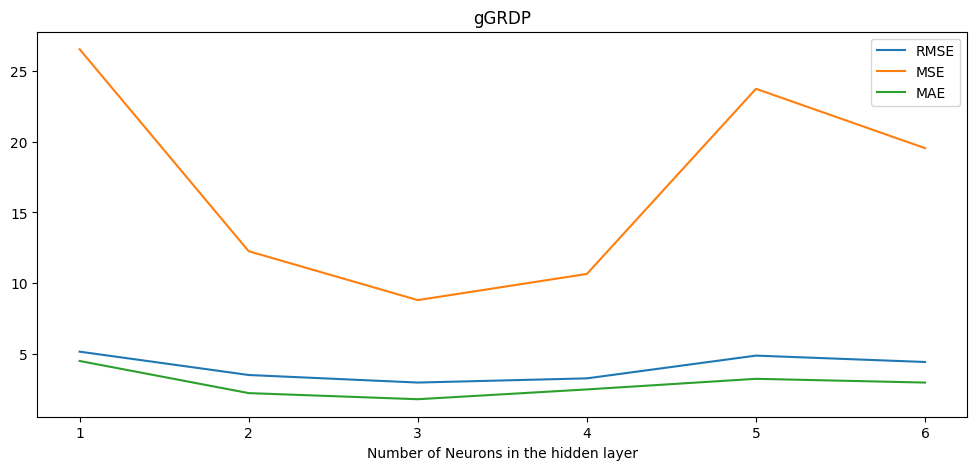

In [66]:
rm['RMSE'].plot(figsize=(12,5),legend=True)
rm['MSE'].plot(legend=True)
rm['MAE'].plot(legend=True)
plt.title('gGRDP')
plt.xlabel('Number of Neurons in the hidden layer')

In [67]:
regr = MLPRegressor(hidden_layer_sizes=(3,),random_state=12, max_iter=1000).fit(X_trainscaled, y_train)

C:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [68]:
network_structure = np.hstack(([X_trainscaled.shape[1]], np.asarray(regr.hidden_layer_sizes), [1]))

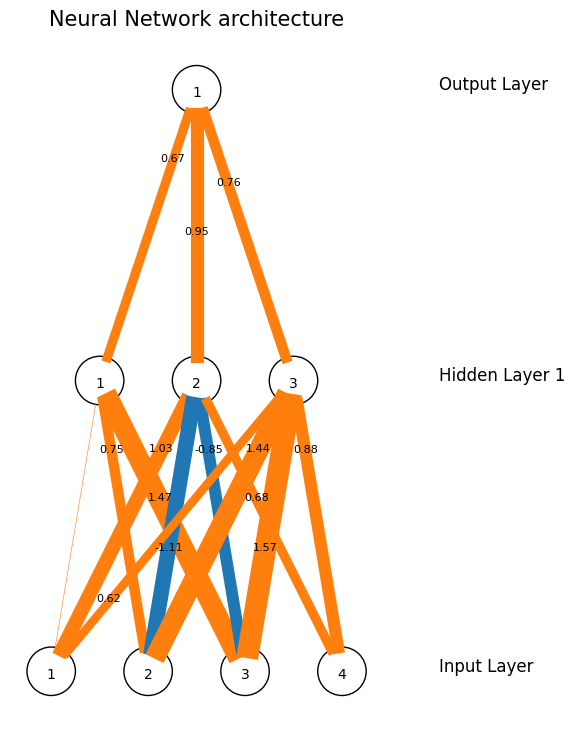

In [69]:
network=VisNN.DrawNN(network_structure, regr.coefs_)
network.draw()

In [70]:
regr.coefs_

[array([[ 0.4071179 ,  1.03001031,  0.61642508],
        [ 0.74724205, -1.11042903,  1.44335791],
        [ 1.46541435, -0.85136418,  1.56695862],
        [-0.01159553,  0.67604304,  0.87625902]]),
 array([[0.66670939],
        [0.94991035],
        [0.75791645]])]

In [71]:
y_pred = regr.predict(X_testscaled)
y_pred

array([1.1434876 , 8.18529675, 1.1434876 , 7.71622534, 3.68182537])

In [72]:
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp.head(7)

,Actual,Predicted
Quarter,,
Q 1/2022,1.88,1.143488
Q 1/2019,7.64,8.185297
Q 4/2021,-5.36,1.143488
Q 3/2017,7.97,7.716225
Q 1/2021,4.58,3.681825


In [73]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  

Root Mean Squared Error: 2.966690724931431
Mean Squared Error: 8.80125385739418
Mean Absolute Error: 1.7874492063233618


In [76]:
y_pred_train = regr.predict(X_trainscaled)
y_pred_train

array([6.52067138, 6.83072824, 3.80851088, 7.02462127, 6.59537153,
       7.66663611, 6.07218526, 4.29937005, 3.11629213, 7.65276086,
       3.17954098, 6.84597411, 2.6121859 , 2.46004245, 2.928253  ,
       8.12010861, 7.89855718, 1.82546828, 7.33071776, 3.26559398])

In [77]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))  

Root Mean Squared Error: 2.4267637569432416
Mean Squared Error: 5.889182332013276
Mean Absolute Error: 1.726902550645273


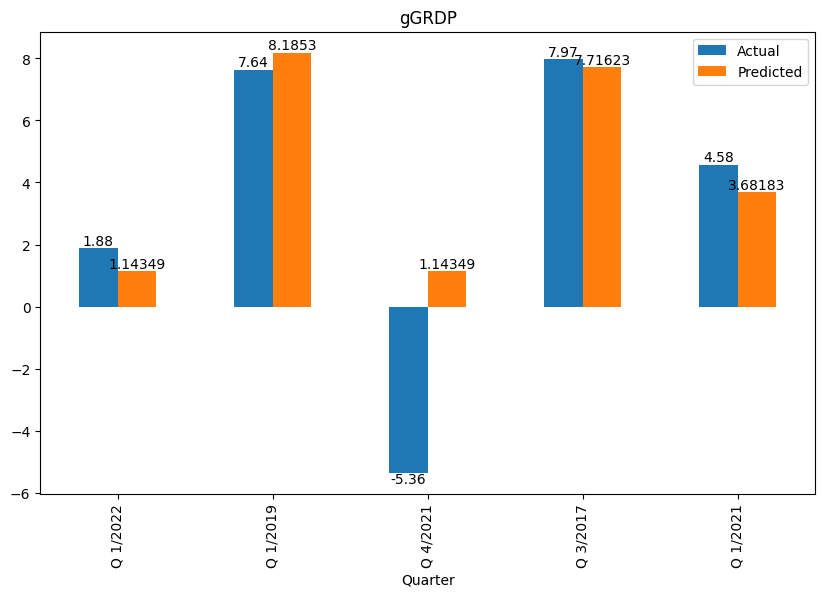

In [75]:
ax = df_temp.plot.bar(figsize=(10,6))
for container in ax.containers:
    ax.bar_label(container)
plt.title('gGRDP')
plt.show()

In [92]:
df_new=pd.read_excel('data_f.xlsx')
df_new.tail()

,Quarter,gGRDP,gAFFS_lag1,gINCS_lag1,gPTX_lag1,gTRSS_lag1
22,Q 4/2022,9.03,3.98,17.36,5.66,8.51
23,Q 1/2023,0.70,3.74,11.95,7.41,8.37
24,Q 2/2023,3.55,2.06,-3.60,1.14,2.07
25,Q3/2023,NaN,2.14,0.80,1.44,4.96
26,Q4/2023,NaN,2.25,1.15,2.46,5.96


In [93]:
df_new.columns

Index(['Quarter', 'gGRDP', 'gAFFS_lag1', 'gINCS_lag1', 'gPTX_lag1',
       'gTRSS_lag1'],
      dtype='object')

In [95]:
X_new=df_new[['gAFFS_lag1', 'gINCS_lag1', 'gPTX_lag1',
       'gTRSS_lag1']]
X_new=sc_X.fit_transform(X_new)

In [96]:
df_new['gGRDP_forecast']=regr.predict(X_new)

In [97]:
df_new.tail()

,Quarter,gGRDP,gAFFS_lag1,gINCS_lag1,gPTX_lag1,gTRSS_lag1,gGRDP_forecast
22,Q 4/2022,9.03,3.98,17.36,5.66,8.51,7.420395
23,Q 1/2023,0.70,3.74,11.95,7.41,8.37,6.740657
24,Q 2/2023,3.55,2.06,-3.60,1.14,2.07,4.526799
25,Q3/2023,NaN,2.14,0.80,1.44,4.96,4.054328
26,Q4/2023,NaN,2.25,1.15,2.46,5.96,3.960256


In [98]:
df_new.to_excel('data_f1.xlsx')

In [100]:
variance_gGRDP_forecast = df_new['gGRDP_forecast'].var()

In [104]:
variance_gGRDP_forecast

5.03209135762252

In [102]:
import math

mean = 4.05  
variance = variance_gGRDP_forecast 
n = 25 
z = 1.96  
margin_of_error = z * math.sqrt(variance / n)

lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error
print(lower_bound,upper_bound)

3.1706529204132723 4.929347079586727


In [103]:
mean = 3.96  
variance = variance_gGRDP_forecast 
n = 25 
z = 1.96  
margin_of_error = z * math.sqrt(variance / n)

lower_bound1 = mean - margin_of_error
upper_bound1 = mean + margin_of_error
print(lower_bound1,upper_bound1)

3.0806529204132724 4.8393470795867275
